# Estudio Extra
- Santiago Andrés Araque Alfonso
- Ricardo Andrés Cortés Coronell
- Julián Mauricio Zafra Moreno

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import sys
from tqdm import tqdm

sys.path.append("./connect4")
sys.path.append("./connect4/groups/GroupA")

from connect4.connect_state import ConnectState
from groups.GroupA.policy import MCTSAgent

## Simulación del Juego

In [ ]:
def play_game(agentA, agentB):
    estado = ConnectState()
    turno = -1  

    while not estado.is_final():
        board = estado.board.copy()

        if turno == -1:
            accion = agentA.act(board)
        else:
            accion = agentB.act(board)

        estado = estado.transition(accion)
        turno *= -1

    return {
        "winner": estado.get_winner()
    }


def evaluate(agentA_constructor, agentB_constructor, games=30):
    res = []
    for _ in tqdm(range(games)):
        A = agentA_constructor()
        B = agentB_constructor()
        res.append(play_game(A, B))
    return res

## Enfrentamiento MCTS (1s) vs MCTS (5s) (Viceversa)
- El MCTS (1s) ganó más partidas tanto en el primer turno como en el segundo.
- Se podría tratar de que quizás con mayor tiempo se exploran nodos irrelevantes
- Se aumenta el ruido estocástico.
- Se pierde precisión en la busqueda.
- Sobrepensamiento computacional.

In [ ]:
def MCTS_1s():
    ag = MCTSAgent()
    ag.tiempo_limite = 1.0
    return ag

def MCTS_5s():
    ag = MCTSAgent()
    ag.tiempo_limite = 5.0
    return ag

In [5]:
print("MCTS(1s) vs MCTS(5s) — 1s empieza")

res_1 = evaluate(MCTS_1s, MCTS_5s, games=5)

wins_1 = sum(r["winner"] == -1 for r in res_1)
wins_5 = sum(r["winner"] == 1 for r in res_1)
draws = sum(r["winner"] == 0 for r in res_1)

print(f"Victorias de 1s: {wins_1}")
print(f"Victorias de 5s: {wins_5}")
print(f"Empates: {draws}")
print(f"Winrate del 1s: {wins_1 / len(res_1):.2f}")
print(f"Winrate del 5s: {wins_5 / len(res_1):.2f}")

MCTS(1s) vs MCTS(5s) — 1s empieza


100%|██████████| 5/5 [05:13<00:00, 62.75s/it]

Ganadas por 1s: 4
Ganadas por 5s: 1
Empates: 0
Winrate del 1s empezando: 0.80
Winrate del 5s empezando: 0.20


In [6]:
print("MCTS(5s) vs MCTS(1s) — 5s empieza")

res_5 = evaluate(MCTS_5s, MCTS_1s, games=5)

wins_5_B = sum(r["winner"] == -1 for r in res_5)
wins_1_B = sum(r["winner"] == 1 for r in res_5)
draws_B = sum(r["winner"] == 0 for r in res_5)

print(f"Victorias de 5s: {wins_5_B}")
print(f"Victorias de 1s: {wins_1_B}")
print(f"Empates: {draws_B}")
print(f"Winrate del 5s: {wins_5_B / len(res_5):.2f}")
print(f"Winrate del 1s: {wins_1_B / len(res_5):.2f}")

MCTS(5s) vs MCTS(1s) — 5s empieza


100%|██████████| 5/5 [08:20<00:00, 100.15s/it]

Ganadas por 5s: 1
Ganadas por 1s: 4
Empates: 0
Winrate del 5s empezando: 0.20
Winrate del 1s empezando: 0.80


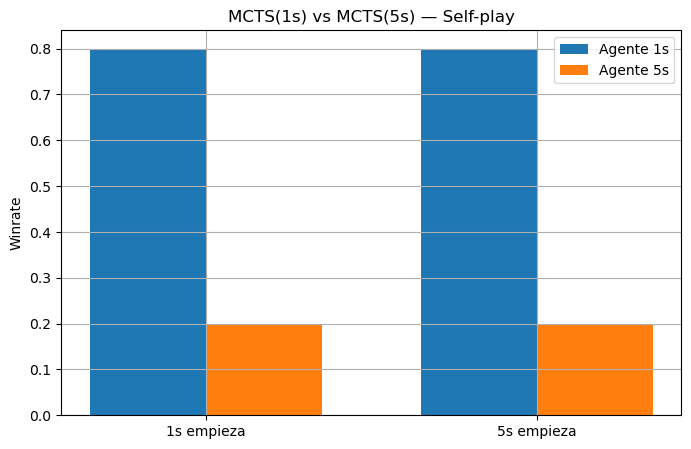

In [7]:
labels = ["1s empieza", "5s empieza"]
winrate_1 = [
    wins_1 / len(res_1),
    wins_1_B / len(res_5)
]
winrate_5 = [
    wins_5 / len(res_1),
    wins_5_B / len(res_5)
]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, winrate_1, width, label="Agente 1s")
plt.bar(x + width/2, winrate_5, width, label="Agente 5s")

plt.xticks(x, labels)
plt.ylabel("Winrate")
plt.title("MCTS(1s) vs MCTS(5s)")
plt.legend()
plt.grid(True)
plt.show()

## Enfrentamiento MCTS (1s) vs MCTS (2s) (Viceversa)
- No hay tanta diferencia pero MCTS ganó más.
- Quizás el efecto se reduce pero igual el agente de menor tiempo de decisión gana más por lo que se ha mencionado anteriormente solo que al reducir el tiempo de 5s a 2s quizás no hay tanta diferenciación.

In [8]:
def MCTS_1s():
    ag = MCTSAgent()
    ag.tiempo_limite = 1.0
    return ag

def MCTS_2s():
    ag = MCTSAgent()
    ag.tiempo_limite = 2.0
    return ag

In [9]:
print("MCTS(1s) vs MCTS(2s) — 1s empieza")

res_1 = evaluate(MCTS_1s, MCTS_2s, games=5)

wins_1 = sum(r["winner"] == -1 for r in res_1)
wins_2 = sum(r["winner"] == 1 for r in res_1)
draws = sum(r["winner"] == 0 for r in res_1)

print(f"Victorias de 1s: {wins_1}")
print(f"Victorias de 2s: {wins_2}")
print(f"Empates: {draws}")
print(f"Winrate del 1s: {wins_1 / len(res_1):.2f}")
print(f"Winrate del 2s: {wins_2 / len(res_1):.2f}")

MCTS(1s) vs MCTS(2s) — 1s empieza


100%|██████████| 5/5 [03:28<00:00, 41.79s/it]

Ganadas por 1s: 2
Ganadas por 2s: 1
Empates: 2
Winrate del 1s empezando: 0.40
Winrate del 2s empezando: 0.20


In [10]:
print("MCTS(2s) vs MCTS(1s) — 2s empieza")

res_2 = evaluate(MCTS_2s, MCTS_1s, games=5)

wins_2_B = sum(r["winner"] == -1 for r in res_2)
wins_1_B = sum(r["winner"] == 1 for r in res_2)
draws_B = sum(r["winner"] == 0 for r in res_2)

print(f"Victorias de 2s: {wins_2_B}")
print(f"Victorias de 1s: {wins_1_B}")
print(f"Empates: {draws_B}")
print(f"Winrate del 2s: {wins_2_B / len(res_2):.2f}")
print(f"Winrate del 1s: {wins_1_B / len(res_2):.2f}")

MCTS(2s) vs MCTS(1s) — 2s empieza


100%|██████████| 5/5 [04:25<00:00, 53.03s/it]

Ganadas por 5s: 2
Ganadas por 1s: 2
Empates: 1
Winrate del 2s empezando: 0.40
Winrate del 1s empezando: 0.40


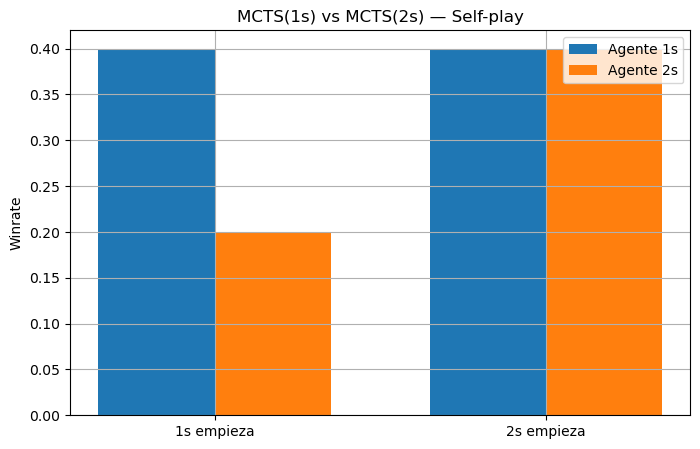

In [11]:
labels = ["1s empieza", "2s empieza"]
winrate_1 = [
    wins_1 / len(res_1),
    wins_1_B / len(res_2)
]
winrate_2 = [
    wins_2 / len(res_1),
    wins_2_B / len(res_2)
]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, winrate_1, width, label="Agente 1s")
plt.bar(x + width/2, winrate_2, width, label="Agente 2s")

plt.xticks(x, labels)
plt.ylabel("Winrate")
plt.title("MCTS(1s) vs MCTS(2s)")
plt.legend()
plt.grid(True)
plt.show()

## Enfrentamiento MCTS (0.1s) vs MCTS (1s) (Viceversa)
- El agente de mayor tiempo osea MCTS (1s) aplastó al de 0.1s.
- Un tiempo de 0.1s ya es demasiado bajo lo cual ya lleva a tomar decisiones incluso casi aleatorias ya que es precipitado todo y muy superficiales.

In [12]:
def MCTS_01s():
    ag = MCTSAgent()
    ag.tiempo_limite = 0.1
    return ag

def MCTS_1s():
    ag = MCTSAgent()
    ag.tiempo_limite = 1.0
    return ag

In [13]:
print("MCTS(0.1s) vs MCTS(1s) — 0.1s empieza")

res_01 = evaluate(MCTS_01s, MCTS_1s, games=5)

wins_01 = sum(r["winner"] == -1 for r in res_01)
wins_1 = sum(r["winner"] == 1 for r in res_01)
draws = sum(r["winner"] == 0 for r in res_01)

print(f"Victorias de 0.1s: {wins_01}")
print(f"Victorias de 1s: {wins_1}")
print(f"Empates: {draws}")
print(f"Winrate del 0.1s: {wins_01 / len(res_01):.2f}")
print(f"Winrate del 1s: {wins_1 / len(res_01):.2f}")

MCTS(0.1s) vs MCTS(1s) — 0.1s empieza


100%|██████████| 5/5 [01:09<00:00, 13.90s/it]

Ganadas por 0.1s: 2
Ganadas por 1s: 2
Empates: 1
Winrate del 0.1s empezando: 0.40
Winrate del 1s empezando: 0.40


In [14]:
print("MCTS(1s) vs MCTS(0.1s) — 1s empieza")

res_1 = evaluate(MCTS_1s, MCTS_01s, games=5)

wins_1_B = sum(r["winner"] == -1 for r in res_1)
wins_01_B = sum(r["winner"] == 1 for r in res_1)
draws_B = sum(r["winner"] == 0 for r in res_1)

print(f"Victorias de 1s: {wins_1_B}")
print(f"Victorias de 0.1s: {wins_01_B}")
print(f"Empates: {draws_B}")
print(f"Winrate del 1s: {wins_1_B / len(res_1):.2f}")
print(f"Winrate del 0.1s: {wins_01_B / len(res_1):.2f}")

MCTS(1s) vs MCTS(0.1s) — 1s empieza


100%|██████████| 5/5 [00:40<00:00,  8.03s/it]

Ganadas por 1s: 5
Ganadas por 0.1s: 0
Empates: 0
Winrate del 1s empezando: 1.00
Winrate del 0.1s empezando: 0.00


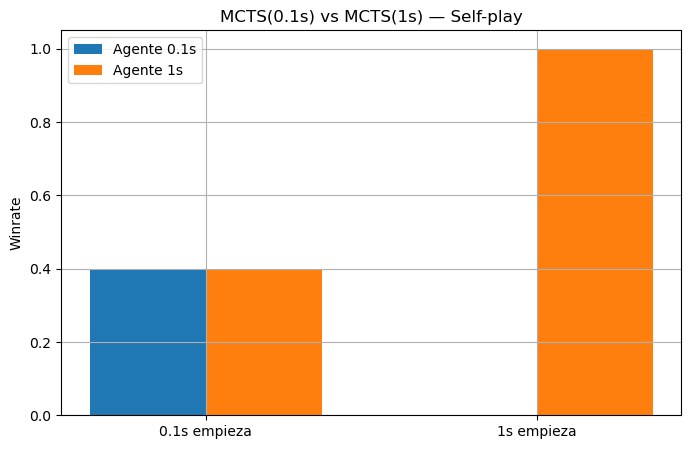

In [15]:
labels = ["0.1s empieza", "1s empieza"]
winrate_01 = [
    wins_01 / len(res_01),
    wins_01_B / len(res_1)
]
winrate_1 = [
    wins_1 / len(res_01),
    wins_1_B / len(res_1)
]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, winrate_01, width, label="Agente 0.1s")
plt.bar(x + width/2, winrate_1, width, label="Agente 1s")

plt.xticks(x, labels)
plt.ylabel("Winrate")
plt.title("MCTS(0.1s) vs MCTS(1s)")
plt.legend()
plt.grid(True)
plt.show()

## Conclusión
Los tres casos demuestran la existencia de un punto óptimo minimo de tiempo, donde el agente es más preciso sin caer en sobreexploración que lleve a decisiones poco óptimas.
- **Muy poco tiempo:** Movimientos malos por falta de búsqueda.
- **Mucho tiempo:** Movimientos peores ya sea por dispersión o exploración inútil.
- **Tiempo moderado (1s):** Mejor equilibrio entre explorar y explotar.
